In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
sns.set_style('white')

In [4]:
mpl.rcParams['figure.figsize'] = 8, 8
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = '0.3'
mpl.rcParams['axes.linewidth'] = 1
mpl.rcParams['axes.labelcolor'] = '0.3'
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 24
mpl.rcParams['patch.edgecolor'] = 'none'
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['xtick.labelsize'] = 18
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['xtick.color'] = '0.3'
mpl.rcParams['ytick.color'] = '0.3'
mpl.rcParams['text.color'] = '0.3'

In [5]:
def plot_supervised_model(name, model, X_test, y_test, y_pred):
    cmap_light = ListedColormap(['#d5deb3', '#a3d1db', '#f5b8b8', '#ffc8a3', '#b792ba', '#aabad1', '#b2d7ca', '#ffe192'])
    cmap_bold = ListedColormap(['#8ba52c', '#00819b', '#e43939'])
    plt.figure(figsize=(8, 8))
#    ax = plt.gca()
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=100, cmap=cmap_bold)
#    ax.legend(y_test, labels, loc=4)
    idx = np.where(y_pred != y_test)
    plt.scatter(X_test[idx, 0], X_test[idx, 1], c=y_pred[idx], s=300, alpha=0.2, cmap=cmap_bold)
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.title(name)
    plt.show()

In [6]:
def plot_unsupervised_model(name, model, X):
    cmap_light = ListedColormap(['#d5deb3', '#a3d1db', '#f5b8b8', '#ffc8a3', '#b792ba', '#aabad1', '#b2d7ca', '#ffe192'])
    cmap_bold = ListedColormap(['#8ba52c', '#00819b', '#e43939'])
    h = .02
    X_sub = X[:, :2]
    model.fit(X_sub, y)
    centroids = model.cluster_centers_
    x_min, x_max = X_sub[:, 0].min() - 1, X_sub[:, 0].max() + 1
    y_min, y_max = X_sub[:, 1].min() - 1, X_sub[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X_sub[:, 0], X_sub[:, 1], s=50, cmap=cmap_bold)
    plt.scatter(centroids[:, 0], centroids[:, 1], 
                marker='x', s=300, linewidths=5,
                color='w', zorder=10)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(name)
    plt.xlabel('Sepal Length', fontsize=20)
    plt.ylabel('Sepal Width', fontsize=20)
    plt.show()

As the final example of a supervised machine learning model, we'll look at K-Nearest Neigbor Classifier and how changing the number of neighbors and the weighting scheme influences model performance.

First, load the same dataset as in the previous example.

In [7]:
iris_dataset = load_iris()
X = iris_dataset.data
y = iris_dataset.target

### K-Nearest Neighbors

In [8]:
models = [('2 Neighbors Uniform Weights', KNeighborsClassifier(n_neighbors=2, weights='uniform')),
          ('5 Neighbors Uniform Weights', KNeighborsClassifier(n_neighbors=5, weights='uniform')),
          ('15 Neighbors Uniform Weights', KNeighborsClassifier(n_neighbors=15, weights='uniform'))]

In [9]:
X_sub = X[:, :3]
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state=42)

In [10]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name + ' Accuracy: ' + str(accuracy_score(y_pred, y_test)))

2 Neighbors Uniform Weights Accuracy: 0.9
5 Neighbors Uniform Weights Accuracy: 0.933333333333
15 Neighbors Uniform Weights Accuracy: 0.966666666667


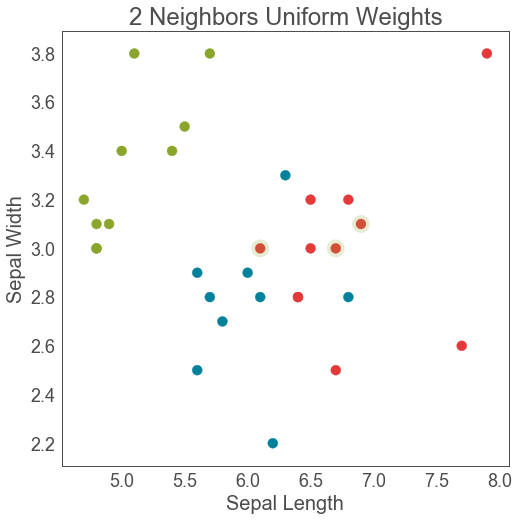

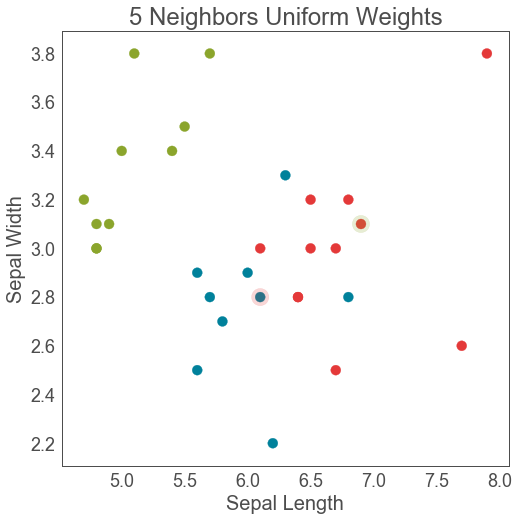

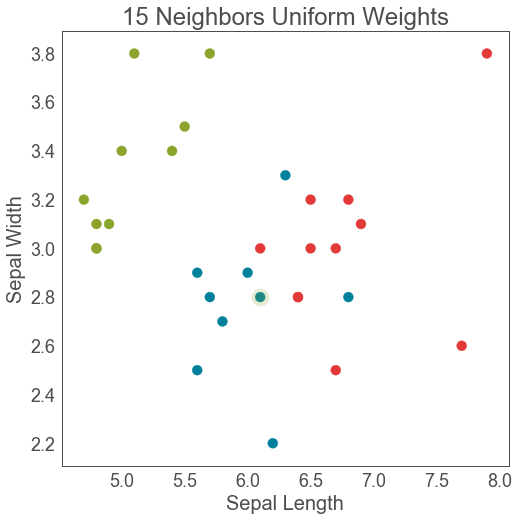

In [11]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_supervised_model(name, model, X_test, y_test, y_pred)

Train the KNN model with weights that are inversely proportional to distance (link to documentation, or tell them weights='distance')

In [12]:
models = [('2 Neighbors Inverse Distance Weights', KNeighborsClassifier(n_neighbors=2, weights='distance')),
          ('5 Neighbors Inverse Distance Weights', KNeighborsClassifier(n_neighbors=5, weights='distance')),
          ('15 Neighbors Inverse Distance Weights', KNeighborsClassifier(n_neighbors=15, weights='distance'))]

2 Neighbors Inverse Distance Weights Accuracy: 0.933333333333


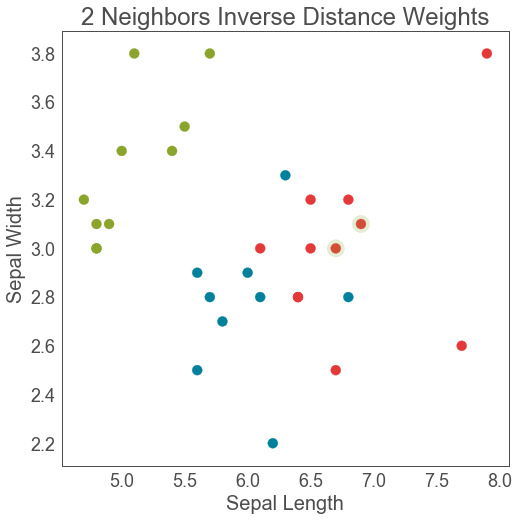

5 Neighbors Inverse Distance Weights Accuracy: 0.933333333333


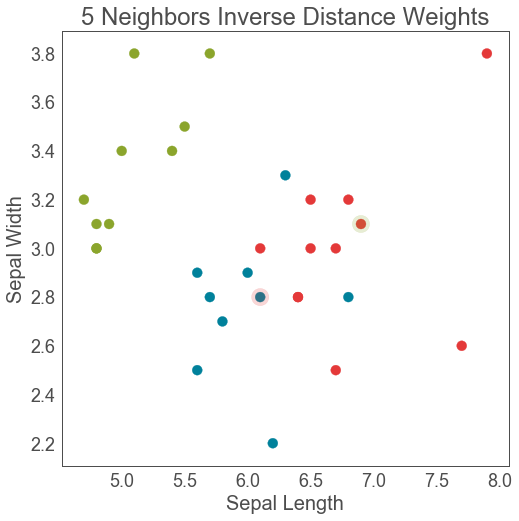

15 Neighbors Inverse Distance Weights Accuracy: 1.0


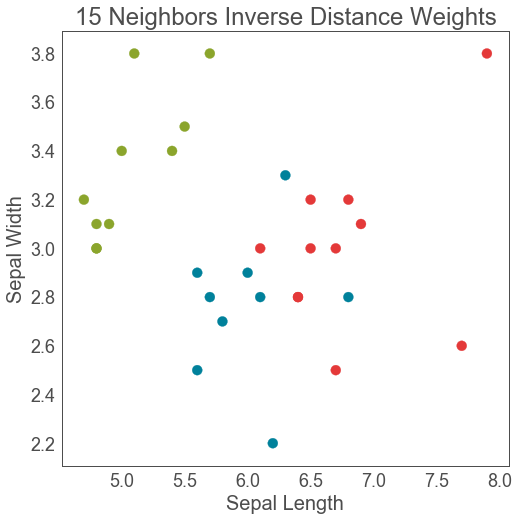

In [13]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name + ' Accuracy: ' + str(accuracy_score(y_pred, y_test)))
    plot_supervised_model(name, model, X_test, y_test, y_pred)